We first calculate an ionization transition potential for the Fe L edge (2p orbital) using the [Flexible Atomic Code (FAC)](https://github.com/flexible-atomic-code/fac). The Flexible atomic code will need to be installed, along with the pfac (python flexible atomic code interface).

First calculate the structure of the bound and ionized Fe electron states.

In [2]:
import pyms
from pyms.Ionization import orbital,transition_potential
%matplotlib inline

#principal and orbital angular momentum quantum numbers for bound state
n=2
l=1
FeL = orbital(26,'1s2 2s2 2p6 3s2 3p6 4s2 3d6',n,l)

#angular momentum quantum number for ionized state
lprime = 2
#Ionization energy (above ionization threshhold energy)
epsilon = 1
FeFree = orbital(26,'1s2 2s2 2p6 3s2 3p6 4s2 3d6',0,lprime,epsilon=epsilon)

#Plot the radial component of the wave function
FeL.plot(show=False)
FeFree.plot(show=False)


NameError: name 'pfac' is not defined

IndexError: index 3 is out of bounds for axis 0 with size 3

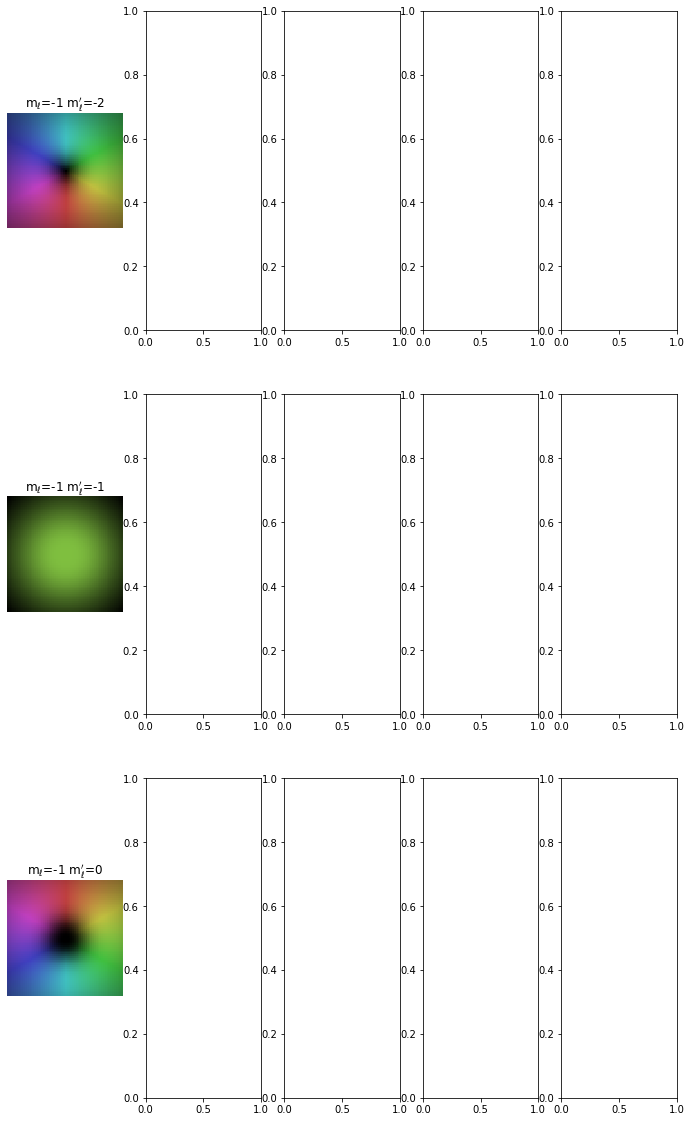

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from Ionization import colorize
# Now calculate the ionization transition potential that can be used in 
# a multislice simulation

#Probe accelerating voltage
keV = 100

#Grid dimensions
gridsize = [5,5]
gridshape = [512,512]

mls = np.arange(-l,l+1)
mlprimes = np.arange(-lprime,lprime+1)

fig,ax = plt.subplots(nrows = mlprimes.shape[0],ncols=mls.shape[0],
                    figsize=(4*mls.shape[0],4*mlprimes.shape[0]))

def crop(array,outsize):
    insize = array.shape
    return array[(insize[0]-outsize[0])//2:(insize[0]+outsize[0])//2,
                 (insize[1]-outsize[1])//2:(insize[1]+outsize[1])//2]

for iml,ml in enumerate(mls):
    for imlprime,mlprime in enumerate(mlprimes):
        Hn0 = transition_potential(FeL,FeFree,gridshape,gridsize,ml,
                                 mlprime,keV)
        Hn0 = np.fft.fftshift(Hn0)
        ax[imlprime,iml].imshow(colorize(crop(Hn0,[x//4 for x in gridshape])))
        title ='m$_\ell$={0} m$_\ell^\prime$={1}'.format(ml,mlprime)
        ax[imlprime,iml].set_title(title)
        ax[imlprime,iml].set_axis_off()
        